**Manish Bhardwaj**

---


**Roll no - 29**

---


**Section-3CB**

---


**NLP Embedding Techniques Assignment**

## **Importing Libraries**

In [1]:
import pandas as pd
import string
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**Loading Dataset**

In [2]:
data = pd.read_csv("/content/dataset_25000.csv")
data.head()


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


**Data Preprocessing**

In [3]:
data.shape

(25000, 2)

In [4]:
print("Class distribution (humor column):")
print(data['humor'].value_counts())
data['label'] = data['humor'].astype(int)
data[['text', 'label']].head(10)

Class distribution (humor column):
humor
True     12545
False    12455
Name: count, dtype: int64


,text,label
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",0
1,Watch: darvish gave hitter whiplash with slow ...,0
2,What do you call a turtle without its shell? d...,1
3,5 reasons the 2016 election feels so personal,0
4,"Pasco police shot mexican migrant from behind,...",0
5,"Martha stewart tweets hideous food photo, twit...",0
6,What is a pokemon master's favorite kind of pa...,1
7,Why do native americans hate it when it rains ...,1
8,"Obama's climate change legacy is impressive, i...",0
9,"My family tree is a cactus, we're all pricks.",1


**Remove punctuation**

In [5]:

text = data["text"].copy()

removePun= []

for line in text:
    for p in string.punctuation:
        line = line.replace(p, "")
    removePun.append(line)

removePun[:5]


['Joe biden rules out 2020 bid guys im not running',
 'Watch darvish gave hitter whiplash with slow pitch',
 'What do you call a turtle without its shell dead',
 '5 reasons the 2016 election feels so personal',
 'Pasco police shot mexican migrant from behind new autopsy shows']

**Convert to lowercase**

In [6]:

lowercase = [line.lower() for line in removePun]
lowercase[:5]

['joe biden rules out 2020 bid guys im not running',
 'watch darvish gave hitter whiplash with slow pitch',
 'what do you call a turtle without its shell dead',
 '5 reasons the 2016 election feels so personal',
 'pasco police shot mexican migrant from behind new autopsy shows']

**Tokenization**

In [7]:
token = [word_tokenize(line) for line in lowercase]

token[:3]   # display first 3 token lists

[['joe',
  'biden',
  'rules',
  'out',
  '2020',
  'bid',
  'guys',
  'im',
  'not',
  'running'],
 ['watch', 'darvish', 'gave', 'hitter', 'whiplash', 'with', 'slow', 'pitch'],
 ['what',
  'do',
  'you',
  'call',
  'a',
  'turtle',
  'without',
  'its',
  'shell',
  'dead']]

**StopWord**

In [8]:
stop_words = set(stopwords.words("english"))

no_stopwords = [
    [word for word in tokens if word not in stop_words]
    for tokens in token
]

no_stopwords[:3]


[['joe', 'biden', 'rules', '2020', 'bid', 'guys', 'im', 'running'],
 ['watch', 'darvish', 'gave', 'hitter', 'whiplash', 'slow', 'pitch'],
 ['call', 'turtle', 'without', 'shell', 'dead']]

**Lemmatization**

In [9]:

lemmatizer = WordNetLemmatizer()
Lemmatize = []

for tokens_list in no_stopwords:
    lemmas = [lemmatizer.lemmatize(t) for t in tokens_list]
    Lemmatize.append(" ".join(lemmas))

**Join Sentence**

In [10]:
clean_text = [
    " ".join(tokens) for tokens in Lemmatize
]

clean_text[:5]

['j o e   b i d e n   r u l e   2 0 2 0   b i d   g u y   i m   r u n n i n g',
 'w a t c h   d a r v i s h   g a v e   h i t t e r   w h i p l a s h   s l o w   p i t c h',
 'c a l l   t u r t l e   w i t h o u t   s h e l l   d e a d',
 '5   r e a s o n   2 0 1 6   e l e c t i o n   f e e l   p e r s o n a l',
 'p a s c o   p o l i c e   s h o t   m e x i c a n   m i g r a n t   b e h i n d   n e w   a u t o p s y   s h o w']

In [11]:
clean_text= pd.DataFrame(Lemmatize, columns=["clean_text"])
clean_text.head()

,clean_text
0,joe biden rule 2020 bid guy im running
1,watch darvish gave hitter whiplash slow pitch
2,call turtle without shell dead
3,5 reason 2016 election feel personal
4,pasco police shot mexican migrant behind new a...


In [12]:
clean_text.shape

(25000, 1)

**Vocabulary**

In [13]:
from collections import Counter

all_words = []

for text in clean_text['clean_text']:
    all_words.extend(text.split())

vocab = sorted(set(all_words))
print("Vocabulary size:", len(vocab))

Vocabulary size: 22659


In [14]:
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

In [15]:
index_to_word = {idx: word for idx, word in enumerate(vocab)}

list(index_to_word.items())[:20]


[(0, '0'),
 (1, '000'),
 (2, '00000'),
 (3, '000000'),
 (4, '007s'),
 (5, '010'),
 (6, '07'),
 (7, '0800'),
 (8, '0k'),
 (9, '0x0000ff'),
 (10, '0x100'),
 (11, '0xff0000'),
 (12, '1'),
 (13, '10'),
 (14, '100'),
 (15, '1000'),
 (16, '10000'),
 (17, '100000'),
 (18, '100footlong'),
 (19, '100inch')]

**One Hot Encoding**

In [16]:
from sklearn.preprocessing import OneHotEncoder

sentences = clean_text["clean_text"].tolist()
sentences = [[word] for word in sentences]

ohe = OneHotEncoder(sparse_output=False)
one_hot_vectors = ohe.fit_transform(sentences)
print(one_hot_vectors.shape)


(25000, 24887)


**Bag Of Word**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow_vectors = cv.fit_transform(clean_text["clean_text"])

print(bow_vectors.shape)


(25000, 22615)


**N-gram**

In [18]:
cv_ngram = CountVectorizer(ngram_range=(2,3))
bon_vectors = cv_ngram.fit_transform(clean_text["clean_text"])

print(bon_vectors.shape)


(25000, 251996)


**TF-IDF**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(clean_text["clean_text"])

print(tfidf_vectors.shape)


(25000, 22615)


**Word2Vec(CBOW)**

In [20]:
!pip install gensim
from gensim.models import Word2Vec

tokenized = [text.split() for text in clean_text["clean_text"]]

w2v_cbow = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, sg=0)
print(w2v_cbow.wv["election"])

[-0.12825358  0.51463264  0.21278651 -0.03880647  0.22125065 -0.66270876
  0.0962626   0.91714424 -0.2054072  -0.2741622  -0.26868472 -0.62724835
 -0.08221783  0.2916427   0.17115375 -0.22299248  0.08616655 -0.45500776
  0.02941257 -0.8849852   0.16126047  0.03750186  0.35353732 -0.16792384
  0.04684714 -0.00822355 -0.25039113 -0.12225629 -0.40353385 -0.01053582
  0.36215022  0.11541969  0.00442992 -0.28516203 -0.04745101  0.36862907
  0.05743418 -0.3247773  -0.23296766 -0.7048844   0.01316565 -0.45940265
 -0.22311229  0.0126473   0.2992611  -0.30117178 -0.2844626  -0.02008404
 -0.00872798  0.31499285  0.17058618 -0.41219187 -0.26770946 -0.09955876
 -0.3914253   0.07065107  0.23886521 -0.09104345 -0.43575022  0.08119639
  0.1784752   0.12688573 -0.07769826  0.10311637 -0.455057    0.38450533
  0.12406837  0.39157045 -0.4280242   0.55889046 -0.1697191   0.23845452
  0.4999008  -0.209054    0.46299723  0.2165158  -0.05852834  0.10503776
 -0.4307881   0.17956083 -0.30613282 -0.1297294  -0

In [21]:
import numpy as np

def get_average_word2vec(tokens_list, model, vector_size):
    vectors = []
    for tokens in tokens_list:
        word_vectors = [model.wv[word] for word in tokens if word in model.wv]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

X_w2v = get_average_word2vec(tokenized, w2v_cbow, 100)

**Skip-Gram**

In [22]:
w2v_skipgram = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, sg=1)
print(w2v_skipgram.wv["election"])


[-3.2134384e-01  2.7320775e-01  2.1013021e-01  6.0424272e-02
  6.2763259e-02 -4.2179233e-01 -1.3101479e-04  3.9136183e-01
 -1.6654891e-01  6.7965955e-02 -2.0026231e-01 -2.6787412e-01
 -3.2579765e-02  2.5303084e-01  1.9599886e-01 -2.3100521e-01
 -6.5866113e-03 -3.8756615e-01 -2.1665523e-02 -5.4612148e-01
  5.8197450e-02 -5.6684960e-02  3.4762689e-01  7.1810834e-02
  1.9447412e-01 -5.5114560e-02 -2.1653685e-01  4.6870656e-02
 -3.0187169e-01 -3.7750456e-02  3.1100059e-01  4.0698532e-02
 -1.8882291e-01 -1.8512727e-01  2.8044047e-02  5.1474482e-02
  3.5751404e-04 -7.3400073e-02 -2.1510844e-01 -2.3200862e-01
  8.0282260e-03 -4.7678638e-01 -2.3464270e-01  5.5041011e-02
  2.3037355e-01 -2.6801533e-01 -2.9086670e-01  7.5099975e-02
 -5.9899658e-02  4.8958573e-02  9.8165624e-02 -1.7778204e-01
 -9.1755360e-02 -7.7120386e-02 -2.1737693e-01 -1.7884608e-01
  2.2732344e-01 -6.2020663e-02 -2.9531276e-01 -4.5544197e-04
  1.4508431e-01  1.1538326e-02  8.0200844e-02  4.9972713e-02
 -4.0030664e-01  1.27415

**Fast-Text**

In [23]:
from gensim.models import FastText

fasttext_model = FastText(sentences=tokenized, vector_size=100, window=5, min_count=1)
print(fasttext_model.wv["election"])
X_fasttext = get_average_word2vec(tokenized, fasttext_model, 100)

[-0.37975177  0.5340854  -0.5208305   0.3784951   0.43396923  0.34099123
 -0.10722329  0.2698129   0.98675305 -0.8521973  -0.55237854 -0.17058457
 -0.5174411   1.0932716   0.1430338  -0.12254243 -0.2736059  -0.5353984
 -0.7308128  -1.2040753  -0.9745009   0.17180283 -0.12800951 -0.5336403
 -0.3037295  -0.46747583 -0.61694133  0.2945218   1.2483519  -0.14350547
 -0.20512435  0.44668528  0.6703505  -0.4246733   0.067508    0.65399396
  0.22678386  1.2084732  -0.8692302   0.36736834  0.7400592  -0.92630696
  0.00530838 -0.9438131  -1.0631629  -0.46267325 -0.37536034 -0.56776226
 -0.17379971  0.25656694  0.17712381 -0.07383581  1.0965534   0.6411814
  0.20268175 -0.37606376 -0.5227535   0.07074805 -0.25795156  0.0864427
  0.94802016 -0.4529999  -1.0477327   1.1541911   0.19073656  0.9293396
  0.24771918 -0.28617692  0.5593254   1.0134794   0.16830942 -0.02498368
  0.42789403 -0.78894275  0.8332746  -0.0566753   0.5170958   0.12092523
 -0.29941234  0.6665942   0.1786285  -0.2467262  -0.2200

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2025-11-20 05:17:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-20 05:17:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-20 05:17:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


**Glove**

In [26]:
import numpy as np

glove_file = "/content/glove.6B.100d.txt"   # REAL pretrained glove file

embeddings_index = {}
with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print("Found words:", len(embeddings_index))
print("Vector example (election):", embeddings_index["election"])

def get_glove_average_vector(tokens_list, glove_embeddings, vector_size):
    vectors = []
    for tokens in tokens_list:
        word_vectors = [glove_embeddings[word] for word in tokens if word in glove_embeddings]
        if word_vectors:
            vectors.append(np.mean(word_vectors, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

X_glove = get_glove_average_vector(tokenized, embeddings_index, 100)

Found words: 400000
Vector example (election): [-1.0099    -0.081107   0.40596   -0.67365    0.3072     0.1757
  0.17734    0.46017   -0.017079  -0.081665  -0.58082   -0.0078334
  0.45448   -0.54727   -0.028427  -0.25477    0.075155   0.24047
  0.19395   -0.11413    0.35495   -0.32314    1.3       -0.45084
 -0.92584   -0.83248    0.0070823 -0.055165   0.67146   -0.41138
  0.92317    0.16679    0.63774   -0.28868   -0.42036   -0.3118
  0.10564   -0.40331   -0.71603    0.1532    -0.98441   -0.84357
  1.0837    -0.73638   -1.0181    -1.0255     0.33402   -1.3106
 -0.59665   -0.64874    0.026353  -0.45967    0.87694    1.3043
 -0.16245   -2.6004     0.41372    0.58397    1.1991     0.0070176
 -1.0968    -0.30687   -0.34511    0.34693    1.408      0.32611
 -0.58305    0.076722   0.16697    0.14879    0.046754   0.30531
 -0.81294   -0.07248   -0.5011     0.17783   -0.46585    0.41289
 -1.518     -0.43424    0.42262   -0.12615    0.41616   -0.15648
 -0.98673   -0.73666    0.07661    0.53163 

**Doc2Vec(DM & DBOW)**

In [27]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged = [TaggedDocument(words=text.split(), tags=[str(i)])
          for i, text in enumerate(clean_text["clean_text"])]

In [28]:
X_skipgram = get_average_word2vec(tokenized, w2v_skipgram, 100)

In [29]:
model_dm = Doc2Vec(tagged, vector_size=100, window=5, min_count=1, dm=1)
print(model_dm.dv["0"])
X_doc2vec_dm = np.array([model_dm.infer_vector(doc.words) for doc in tagged])

[-0.0146557   0.01300539  0.00177199  0.00536179  0.01212659 -0.03374682
 -0.00702887  0.04234776 -0.02039402 -0.0119209  -0.00765407 -0.02389105
 -0.01038312  0.00882115  0.00755704 -0.02133937  0.0093443  -0.01302897
 -0.01063657 -0.04702391  0.00698877  0.00291501  0.0123486  -0.00794388
  0.00800272 -0.00917783 -0.01939723 -0.0191536  -0.01272282 -0.00314283
  0.02320271  0.01639876 -0.00731431 -0.0198435  -0.00573804  0.02486849
 -0.00106205 -0.02556664 -0.01533473 -0.02845724 -0.00046187 -0.02982192
 -0.0009852  -0.00535067  0.00936939 -0.02212447 -0.01303509 -0.0062977
  0.00786456  0.01292068  0.0111797  -0.01873186 -0.01382892 -0.01140728
 -0.02024563  0.01454304  0.00490358  0.00171192 -0.02740284  0.0125565
  0.00607557  0.01884883 -0.00291017 -0.00482752 -0.017457    0.01695591
  0.01181475  0.01652956 -0.02875134  0.01856536 -0.01674959  0.01772283
  0.01512185 -0.02066119  0.01335256  0.01415868 -0.01148529 -0.00808215
 -0.01486704  0.00866212 -0.00592224 -0.00176225 -0.0

In [30]:
model_dbow = Doc2Vec(tagged, vector_size=100, window=5, min_count=1, dm=0)
print(model_dbow.dv["0"])
X_doc2vec_dbow = np.array([model_dbow.infer_vector(doc.words) for doc in tagged])

[-4.79906984e-03 -8.84843152e-03 -1.04166567e-02  5.64288022e-03
  3.16875149e-03 -2.95457412e-05 -1.26489718e-02 -5.31906309e-03
 -9.88228992e-03 -8.09515186e-05  3.69514851e-03  4.59963130e-03
 -4.92556812e-03 -3.29893315e-03 -3.90193262e-03 -9.09066014e-03
  2.56925239e-03  7.60814454e-03 -8.60855822e-03 -1.88499212e-03
 -2.80338130e-03  4.23433073e-03 -5.53978002e-03  1.24073576e-03
  6.53795991e-03 -7.35883275e-03 -7.61245005e-03 -1.08230906e-02
  3.93443881e-03 -1.00491345e-02  6.49232417e-03  4.88792825e-03
 -7.74311554e-03 -4.77831811e-03 -3.24132619e-03  4.44802310e-04
 -2.35070498e-03 -5.90324402e-03 -3.87597270e-03  2.65196874e-03
 -2.81545427e-03 -6.70051016e-03  6.96028955e-03 -8.32802802e-03
  9.27843852e-04 -7.25349179e-03  2.95651844e-03 -1.61785213e-03
  5.10711875e-03 -6.32112706e-03 -7.46493228e-04 -4.41384560e-04
 -3.85364657e-03 -6.64411671e-03 -3.91688943e-03  6.01162482e-03
 -3.56618920e-03  2.84316996e-03 -7.68721569e-03  9.18895379e-03
  3.20920767e-03  8.82041

**Train Test Split(OHE , BOW ,N-gram ,TF-IDF ,W2V(Cbow,SkipG) , Doc2vec(DM,Dbow ),Fast-text,Glove)**

In [31]:
from sklearn.model_selection import train_test_split

y = data['humor'] # Define the target variable


In [32]:
# 1. Bag of Words
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_vectors, y, test_size=0.2, random_state=42)

In [33]:
# 2. N-gram (bigram/trigram)
X_train_ng, X_test_ng, y_train_ng, y_test_ng = train_test_split(
    bon_vectors, y, test_size=0.2, random_state=42)

In [34]:
# 3. TF-IDF (unigram)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_vectors, y, test_size=0.2, random_state=42)

In [35]:
# 4. Word2Vec CBOW
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42)

In [36]:
# 5. Word2Vec SkipGram
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(
    X_skipgram, y, test_size=0.2, random_state=42)

In [37]:
# 6. fastText
X_train_fast, X_test_fast, y_train_fast, y_test_fast = train_test_split(
    X_fasttext, y, test_size=0.2, random_state=42)

In [38]:
# 7. GloVe
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(
    X_glove, y, test_size=0.2, random_state=42)

In [39]:
X_train_dm, X_test_dm, y_train_dm, y_test_dm = train_test_split(
    X_doc2vec_dm, y, test_size=0.2, random_state=42)

In [40]:
# 9. Doc2Vec DBOW
X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow = train_test_split(
    X_doc2vec_dbow, y, test_size=0.2, random_state=42)

In [41]:
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)

**Logistic Regression for All Embedding tech**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [43]:
def evaluate_lr(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    }


In [44]:
lr_datasets = {
    "BoW": (X_train_bow, X_test_bow, y_train_bow, y_test_bow),
    "N-gram": (X_train_ng, X_test_ng, y_train_ng, y_test_ng),
    "TF-IDF": (X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf),
    "Word2Vec_CBOW": (X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v),
    "Word2Vec_SkipGram": (X_train_sg, X_test_sg, y_train_sg, y_test_sg),
    "fastText": (X_train_fast, X_test_fast, y_train_fast, y_test_fast),
    "GloVe": (X_train_glove, X_test_glove, y_train_glove, y_test_glove),
    "Doc2Vec_DM": (X_train_dm, X_test_dm, y_train_dm, y_test_dm),
    "Doc2Vec_DBOW": (X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow)
}

In [45]:
lr_results = {}

for name, (Xtr, Xte, ytr, yte) in lr_datasets.items():
    print(f"Running LR on {name}...")
    lr_results[name] = evaluate_lr(Xtr, Xte, ytr, yte)

Running LR on BoW...
Running LR on N-gram...
Running LR on TF-IDF...
Running LR on Word2Vec_CBOW...
Running LR on Word2Vec_SkipGram...
Running LR on fastText...
Running LR on GloVe...
Running LR on Doc2Vec_DM...
Running LR on Doc2Vec_DBOW...


In [46]:
import pandas as pd
lr_results_df = pd.DataFrame(lr_results).T
lr_results_df

,Accuracy,Precision,Recall,F1-Score
BoW,0.8816,0.882446,0.882446,0.882446
N-gram,0.7632,0.848485,0.644956,0.732852
TF-IDF,0.8814,0.891738,0.870135,0.880804
Word2Vec_CBOW,0.7636,0.799552,0.708102,0.751053
Word2Vec_SkipGram,0.8396,0.852217,0.824464,0.838111
fastText,0.7442,0.769700,0.702145,0.734372
GloVe,0.8162,0.810968,0.828038,0.819414
Doc2Vec_DM,0.8028,0.808126,0.797855,0.802958
Doc2Vec_DBOW,0.6244,0.627085,0.627085,0.627085


In [47]:
def evaluate_rf(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    }


In [48]:
rf_datasets = {
    "Word2Vec_CBOW": (X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v),
    "Word2Vec_SkipGram": (X_train_sg, X_test_sg, y_train_sg, y_test_sg),
    "fastText": (X_train_fast, X_test_fast, y_train_fast, y_test_fast),
    "GloVe": (X_train_glove, X_test_glove, y_train_glove, y_test_glove),
    "Doc2Vec_DM": (X_train_dm, X_test_dm, y_train_dm, y_test_dm),
    "Doc2Vec_DBOW": (X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow),
}

In [49]:
rf_results = {}

for name, (Xtr, Xte, ytr, yte) in rf_datasets.items():
    print(f"Training Random Forest on {name}...")
    rf_results[name] = evaluate_rf(Xtr, Xte, ytr, yte)

Training Random Forest on Word2Vec_CBOW...
Training Random Forest on Word2Vec_SkipGram...
Training Random Forest on fastText...
Training Random Forest on GloVe...
Training Random Forest on Doc2Vec_DM...
Training Random Forest on Doc2Vec_DBOW...


In [50]:
import pandas as pd

rf_results_df = pd.DataFrame(rf_results).T
rf_results_df

,Accuracy,Precision,Recall,F1-Score
Word2Vec_CBOW,0.7850,0.796791,0.769261,0.782784
Word2Vec_SkipGram,0.8480,0.854150,0.841938,0.848000
fastText,0.7542,0.758110,0.751787,0.754935
GloVe,0.7954,0.804481,0.784353,0.794289
Doc2Vec_DM,0.8108,0.813397,0.810167,0.811779
Doc2Vec_DBOW,0.6358,0.647607,0.607228,0.626768


**ANN for Advance Embedding**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
def build_ann(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [53]:
def evaluate_ann(X_train, X_test, y_train, y_test, epochs=10, batch_size=32):
    input_dim = X_train.shape[1]
    model = build_ann(input_dim)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    _, accuracy_ann = model.evaluate(X_test, y_test, verbose=0)
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

ann_sets = {
    "Word2Vec_CBOW": (X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v),
    "Word2Vec_SkipGram": (X_train_sg, X_test_sg, y_train_sg, y_test_sg),
    "fastText": (X_train_fast, X_test_fast, y_train_fast, y_test_fast),
    "GloVe": (X_train_glove, X_test_glove, y_train_glove, y_test_glove),
    "Doc2Vec_DM": (X_train_dm, X_test_dm, y_train_dm, y_test_dm),
    "Doc2Vec_DBOW": (X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow)
}

In [54]:
ann_results = {}

for name, (Xtr, Xte, ytr, yte) in ann_sets.items():
    print(f"Training ANN on {name}...")
    ann_results[name] = evaluate_ann(Xtr, Xte, ytr, yte)

Training ANN on Word2Vec_CBOW...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN on Word2Vec_SkipGram...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN on fastText...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN on GloVe...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN on Doc2Vec_DM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN on Doc2Vec_DBOW...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
ann_results_df = pd.DataFrame(ann_results).T
ann_results_df

,Accuracy,Precision,Recall,F1-Score
Word2Vec_CBOW,0.7868,0.785827,0.792693,0.789245
Word2Vec_SkipGram,0.8268,0.776995,0.920175,0.842545
fastText,0.7406,0.714135,0.808578,0.758428
GloVe,0.8336,0.811530,0.872121,0.840735
Doc2Vec_DM,0.8160,0.827728,0.801430,0.814366
Doc2Vec_DBOW,0.6382,0.640396,0.642176,0.641285


**Embedding matrix using the w2v_cbow model**

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 1. Convert tokenized sentences to sequences of word indices
indexed_sentences = []
for sentence_tokens in tokenized:
    indexed_sentence = [word2idx[word] for word in sentence_tokens if word in word2idx]
    indexed_sentences.append(indexed_sentence)

# 2. Determine the maximum sequence length
max_len = max(len(s) for s in indexed_sentences)
print(f"Maximum sequence length: {max_len}")

# 3. Pad the indexed_sentences to max_len
X_padded_sequences = pad_sequences(indexed_sentences, maxlen=max_len, padding='post')
print(f"Shape of padded sequences: {X_padded_sequences.shape}")

# 4. Create an embedding matrix using the w2v_cbow model
vector_size = 100  # Word2Vec vector size
embedding_matrix = np.zeros((len(vocab), vector_size))

for word, i in word2idx.items():
    if word in w2v_cbow.wv:
        embedding_matrix[i] = w2v_cbow.wv[word]

print(f"Shape of embedding matrix: {embedding_matrix.shape}")

Maximum sequence length: 16
Shape of padded sequences: (25000, 16)
Shape of embedding matrix: (22659, 100)


**RNN**

In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded_sequences, y, test_size=0.2, random_state=42)

def create_and_evaluate_sequential_model(model_type, X_train, X_test, y_train, y_test, embedding_matrix, vocab_size, vector_size, max_len, epochs=10, batch_size=32):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=vector_size,
                        weights=[embedding_matrix],
                        trainable=False))

    if model_type == 'RNN':
        model.add(SimpleRNN(units=100))
    elif model_type == 'LSTM':
        model.add(LSTM(units=100))
    elif model_type == 'GRU':
        model.add(GRU(units=100))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training {model_type}...")
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

results_rnn = create_and_evaluate_sequential_model('RNN', X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn, embedding_matrix, len(vocab), vector_size, max_len)
print(f"\nModel Performance with RNN:")
for key, value in results_rnn.items():
    print(f"{key}: {value:.4f}")

accuracy_rnn = results_rnn['Accuracy']
precision_rnn = results_rnn['Precision']
recall_rnn = results_rnn['Recall']
f1_rnn = results_rnn['F1-Score']

Training RNN...

Model Performance with RNN:
Accuracy: 0.7280
Precision: 0.6592
Recall: 0.9523
F1-Score: 0.7791


**LSTM**

In [58]:
from tensorflow.keras.layers import LSTM

results_lstm = create_and_evaluate_sequential_model('LSTM', X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn, embedding_matrix, len(vocab), vector_size, max_len)

print(f"\nModel Performance with LSTM:")
for key, value in results_lstm.items():
    print(f"{key}: {value:.4f}")

accuracy_lstm = results_lstm['Accuracy']
precision_lstm = results_lstm['Precision']
recall_lstm = results_lstm['Recall']
f1_lstm = results_lstm['F1-Score']

Training LSTM...

Model Performance with LSTM:
Accuracy: 0.7984
Precision: 0.8473
Recall: 0.7315
F1-Score: 0.7852


**GRU**

In [59]:
from tensorflow.keras.layers import GRU

results_gru = create_and_evaluate_sequential_model('GRU', X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn, embedding_matrix, len(vocab), vector_size, max_len)

print(f"\nModel Performance with GRU:")
for key, value in results_gru.items():
    print(f"{key}: {value:.4f}")

accuracy_gru = results_gru['Accuracy']
precision_gru = results_gru['Precision']
recall_gru = results_gru['Recall']
f1_gru = results_gru['F1-Score']

Training GRU...

Model Performance with GRU:
Accuracy: 0.8076
Precision: 0.8559
Recall: 0.7431
F1-Score: 0.7955


**Final Result**

In [60]:
new_results_rnn_lstm_gru = {
    "Model": [
        "RNN (CBOW)",
        "LSTM (CBOW)",
        "GRU (CBOW)"
    ],
    "Accuracy": [
        accuracy_rnn,
        accuracy_lstm,
        accuracy_gru
    ],
    "Precision": [
        precision_rnn,
        precision_lstm,
        precision_gru
    ],
    "Recall": [
        recall_rnn,
        recall_lstm,
        recall_gru
    ],
    "F1-Score": [
        f1_rnn,
        f1_lstm,
        f1_gru
    ]
}

df_new_results = pd.DataFrame(new_results_rnn_lstm_gru)
# Add prefixes to the new results
df_new_results['Model'] = df_new_results['Model'].apply(lambda x: x.split(' ')[0] + '_' + '_'.join(x.split(' ')[1:]))

# Initialize df_results with existing dataframes and add prefixes
df_results = pd.concat([
    lr_results_df.reset_index().rename(columns={'index': 'Model'}).assign(Model=lambda x: 'LR_' + x['Model']),
    rf_results_df.reset_index().rename(columns={'index': 'Model'}).assign(Model=lambda x: 'RF_' + x['Model']),
    ann_results_df.reset_index().rename(columns={'index': 'Model'}).assign(Model=lambda x: 'ANN_' + x['Model'])
], ignore_index=True)

df_results = pd.concat([df_results, df_new_results], ignore_index=True)
print(df_results)

                    Model  Accuracy  Precision    Recall  F1-Score
0                  LR_BoW    0.8816   0.882446  0.882446  0.882446
1               LR_N-gram    0.7632   0.848485  0.644956  0.732852
2               LR_TF-IDF    0.8814   0.891738  0.870135  0.880804
3        LR_Word2Vec_CBOW    0.7636   0.799552  0.708102  0.751053
4    LR_Word2Vec_SkipGram    0.8396   0.852217  0.824464  0.838111
5             LR_fastText    0.7442   0.769700  0.702145  0.734372
6                LR_GloVe    0.8162   0.810968  0.828038  0.819414
7           LR_Doc2Vec_DM    0.8028   0.808126  0.797855  0.802958
8         LR_Doc2Vec_DBOW    0.6244   0.627085  0.627085  0.627085
9        RF_Word2Vec_CBOW    0.7850   0.796791  0.769261  0.782784
10   RF_Word2Vec_SkipGram    0.8480   0.854150  0.841938  0.848000
11            RF_fastText    0.7542   0.758110  0.751787  0.754935
12               RF_GloVe    0.7954   0.804481  0.784353  0.794289
13          RF_Doc2Vec_DM    0.8108   0.813397  0.810167  0.81

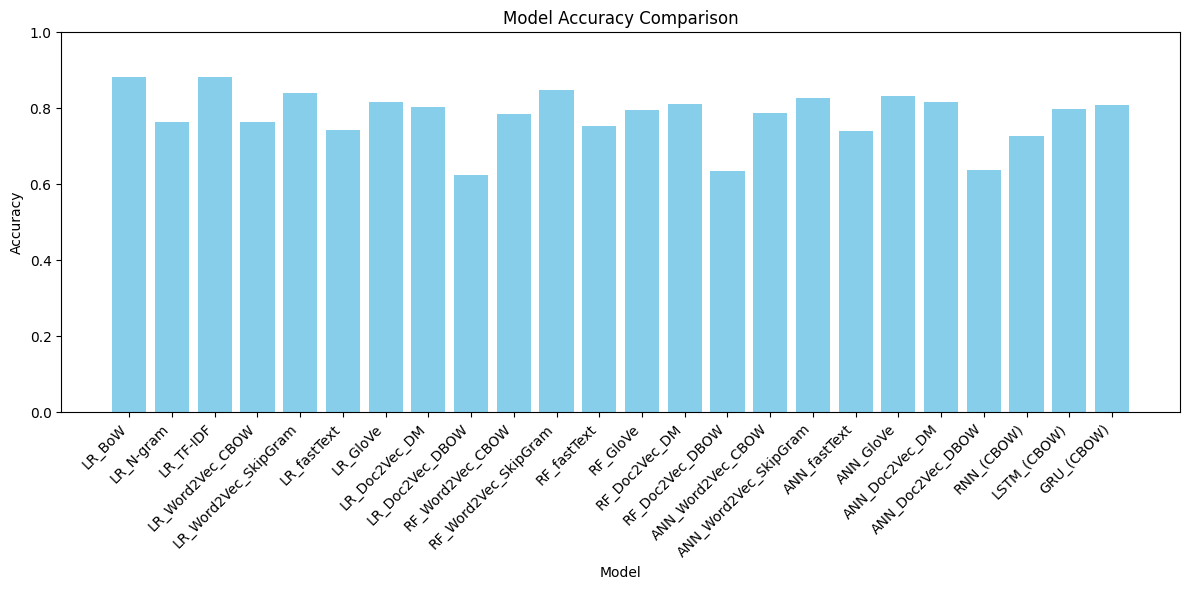

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.tight_layout()
plt.show()